# Workshop 6 FS_MovieReview Classification



In [ ]:
!wget https://raw.githubusercontent.com/Thundertung/FS_movie_data/main/movie_review_th_test.csv
!wget https://raw.githubusercontent.com/Thundertung/FS_movie_data/main/movie_review_th_train.csv

--2025-10-26 08:47:12--  https://raw.githubusercontent.com/Thundertung/FS_movie_data/main/movie_review_th_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 508888 (497K) [text/plain]
Saving to: ‘movie_review_th_test.csv’

movie_review_th_tes 100%[===================>] 496.96K  --.-KB/s    in 0.05s   

2025-10-26 08:47:13 (9.73 MB/s) - ‘movie_review_th_test.csv’ saved [508888/508888]

--2025-10-26 08:47:13--  https://raw.githubusercontent.com/Thundertung/FS_movie_data/main/movie_review_th_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respo

In [ ]:
!pip install pythainlp
!pip install scikit-learn
!pip install pandas
!pip install seaborn
!pip install wordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 89.8 MB/s eta 0:00:00


# อ่าน Train Test Dataset

In [ ]:
import pandas as pd


df_train = pd.read_csv('movie_review_th_train.csv')
df_test = pd.read_csv('movie_review_th_test.csv')

In [ ]:
print(df_train.shape)
print(df_test.shape)

(1500, 37)
(300, 37)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1500 non-null   int64 
 1   Title           1500 non-null   object
 2   Year            1500 non-null   int64 
 3   Genres          1500 non-null   object
 4   IMDB ID         1500 non-null   object
 5   Runtime         1500 non-null   int64 
 6   Director        1500 non-null   object
 7   Writers         1489 non-null   object
 8   Cast            1485 non-null   object
 9   Summary_th      1500 non-null   object
 10  Rounded_rating  1500 non-null   int64 
 11  list_genres     1500 non-null   object
 12  Action          1500 non-null   int64 
 13  Adventure       1500 non-null   int64 
 14  Animation       1500 non-null   int64 
 15  Biography       1500 non-null   int64 
 16  Comedy          1500 non-null   int64 
 17  Crime           1500 non-null   int64 
 18  Document

#Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud

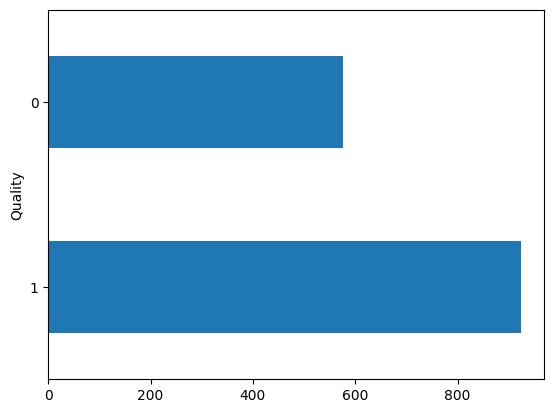

In [ ]:
df_train.Quality.value_counts().plot.barh()
plt.show()

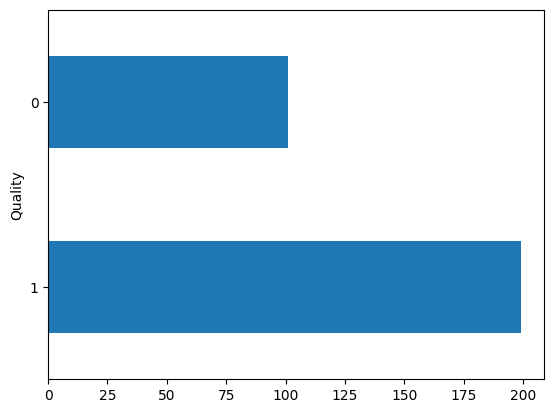

In [ ]:
df_test.Quality.value_counts().plot.barh()
plt.show()

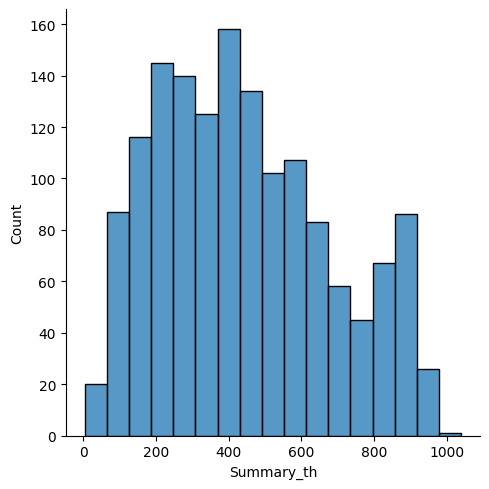

In [ ]:
sns.displot(df_train.Summary_th.apply(len))

In [ ]:
df_all_values = df_train.Quality.value_counts().to_frame()
df_all_values.columns = ['quality_train']
df_all_values['quality_test'] = df_test.Quality.value_counts()
df_all_values['percentage_train'] = df_all_values.quality_train.apply(lambda x : x /df_all_values.sum()[0])
df_all_values['percentage_test'] = df_all_values.quality_test.apply(lambda x : x /df_all_values.sum()[1])
df_all_values

/tmp/ipython-input-4018187150.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_all_values['percentage_train'] = df_all_values.quality_train.apply(lambda x : x /df_all_values.sum()[0])
/tmp/ipython-input-4018187150.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_all_values['percentage_test'] = df_all_values.quality_test.apply(lambda x : x /df_all_values.sum()[1])


,quality_train,quality_test,percentage_train,percentage_test
Quality,,,,
1,923,199,0.615333,0.663333
0,577,101,0.384667,0.336667


In [ ]:
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize

def get_text_str(message):
  tokenized =" "
  th_stw = thai_stopwords()
  for i in message:
    token = word_tokenize(i)
    for j in token:
      if j not in thai_stopwords():
        tokenized =tokenized + " " + j

  return tokenized


text = get_text_str(df_train.Summary_th)

In [ ]:
# สร้างโฟลเดอร์เก็บฟอนต์
!mkdir -p /usr/share/fonts/truetype/thai/

# ดาวน์โหลดไฟล์ zip โดยใช้ URL ตรงไปยังไฟล์และกำหนด user-agent ให้เหมือน browser
!wget -O THSarabunNew.zip "https://www.f0nt.com/wp-content/files/sipafonts/THSarabunNew.zip" \
     --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64)"

# แตกไฟล์ไปยังโฟลเดอร์ฟอนต์
!unzip -o THSarabunNew.zip -d /usr/share/fonts/truetype/thai/

# รีเฟรช cache ฟอนต์
!fc-cache -fv

# ตรวจสอบไฟล์ .ttf
!ls /usr/share/fonts/truetype/thai/


--2025-10-26 08:50:53--  https://www.f0nt.com/wp-content/files/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 434047 (424K) [application/zip]
Saving to: ‘THSarabunNew.zip’

THSarabunNew.zip    100%[===================>] 423.87K   602KB/s    in 0.7s    

2025-10-26 08:50:55 (602 KB/s) - ‘THSarabunNew.zip’ saved [434047/434047]

Archive:  THSarabunNew.zip
  inflating: /usr/share/fonts/truetype/thai/THSarabunNew Italic.ttf  
   creating: /usr/share/fonts/truetype/thai/__MACOSX/
  inflating: /usr/share/fonts/truetype/thai/__MACOSX/._THSarabunNew Italic.ttf  
  inflating: /usr/share/fonts/truetype/thai/THSarabunNew.ttf  
  inflating: /usr/share/fonts/truetype/thai/__MACOSX/._THSarabunNew.ttf  
  inflating: /usr/share/fonts/truetype/thai/THSarabunNew BoldItalic.ttf  
  inflating: /usr/share/fonts/truetype

In [ ]:
regexp = r"[ก-๙a-zA-Z']+"
path = 'THSarabunNew.ttf'
wordcloud = WordCloud(
                      font_path=path,
                      min_font_size=1,
                      background_color="white",
                      width=400,
                      height=200,
                      max_words=1000,
                      colormap='plasma',
                      scale=3,
                      font_step=4,
                      contour_color='steelblue',
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)

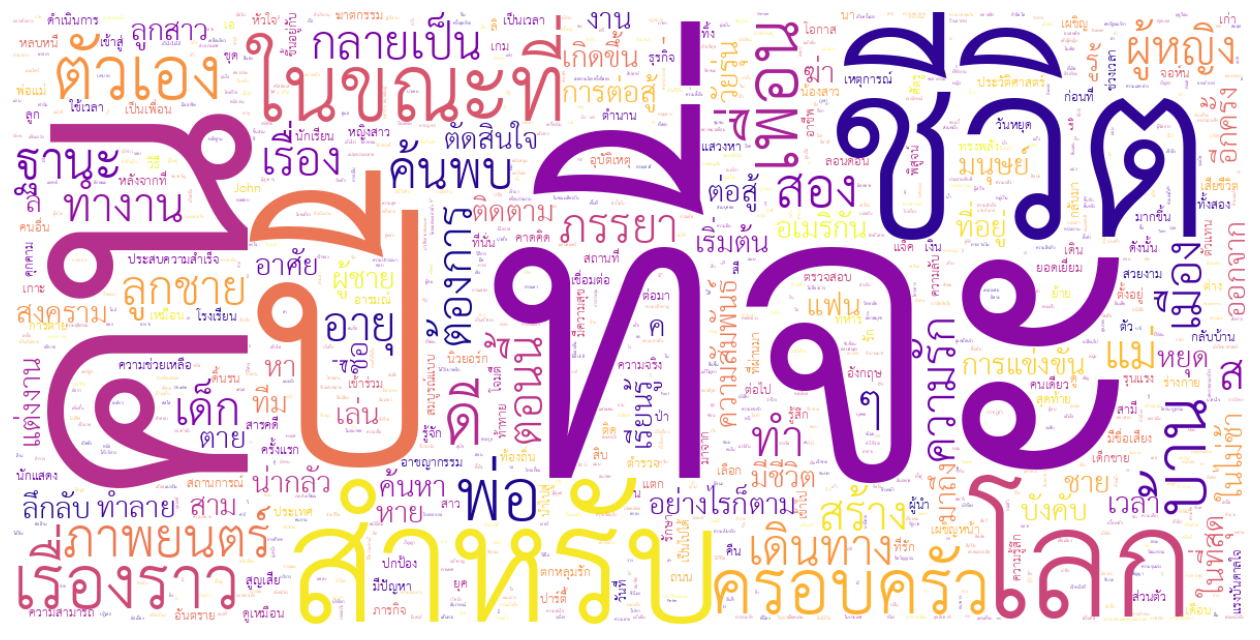

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

# Text Clean

In [ ]:
import re
import string
def clean_text(txt):


    # ลบ space
    txt = re.sub(r' ','',txt)

    #ลบ เลข
    txt = re.sub("(\d)", "",txt)

    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        txt = re.sub(r'\{}'.format(c),'',txt)

    # ลบ separator เช่น \n \t
    txt = ' '.join(txt.split())

    return txt



df_train.Summary_th = df_train.Summary_th.apply(clean_text)
df_test.Summary_th = df_test.Summary_th.apply(clean_text)

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3908700042.py:10: SyntaxWarning: invalid escape sequence '\d'
  txt = re.sub("(\d)", "",txt)


In [ ]:
print('dirty text: ',df_train.Summary_th[0])
print('clean text: ',clean_text(df_train.Summary_th[0]))

dirty text:  PattonOswaldแม้จะมีโศกนาฏกรรมส่วนตัวแต่ยังสร้างจุดเด่นที่ดีที่สุดของเขามุ่งเน้นไปที่ความยากลำบากของยุคที่ทรัมป์และชีวิตหลังจากการสูญเสียคนที่คุณรักPattonOswaldยังคงเดินทางสู่ความสุขสู่โลก
clean text:  PattonOswaldแม้จะมีโศกนาฏกรรมส่วนตัวแต่ยังสร้างจุดเด่นที่ดีที่สุดของเขามุ่งเน้นไปที่ความยากลำบากของยุคที่ทรัมป์และชีวิตหลังจากการสูญเสียคนที่คุณรักPattonOswaldยังคงเดินทางสู่ความสุขสู่โลก


# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pythainlp

tfidf_vec = TfidfVectorizer(tokenizer = pythainlp.tokenize.word_tokenize,ngram_range=(1, 2))
tfidf = tfidf_vec.fit_transform(df_train.Summary_th).toarray()
tfidf_test = tfidf_vec.transform(df_test.Summary_th).toarray()


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
print(tfidf.shape)
print(tfidf_test.shape)

(1500, 78804)
(300, 78804)


# Quality classification

In [ ]:
y = np.array(df_train.Quality) # turn train label into array
y_test = np.array(df_test.Quality) # turn test label into array

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(random_state=0)
Lr.fit(tfidf, y)
y_pred = Lr.predict(tfidf_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.66
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       101
           1       0.66      0.99      0.79       199

    accuracy                           0.66       300
   macro avg       0.50      0.50      0.41       300
weighted avg       0.55      0.66      0.53       300



# Use additional data for classification

In [ ]:
df_train.columns[12:]

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'Uncategorized', 'War', 'Western',
       'Quality'],
      dtype='object')

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


ValueError: The name Quality occurs multiple times, use a level number

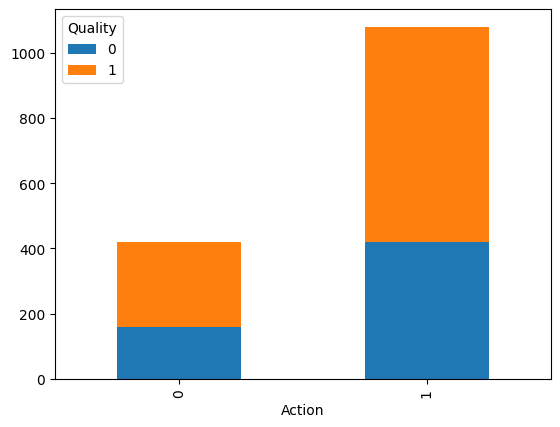

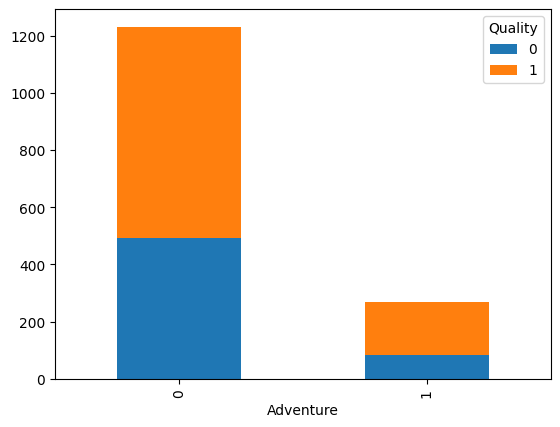

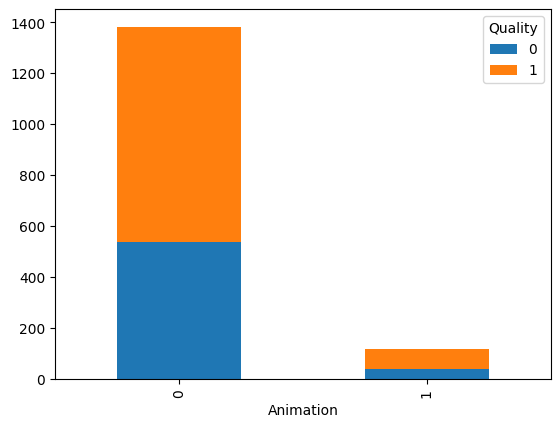

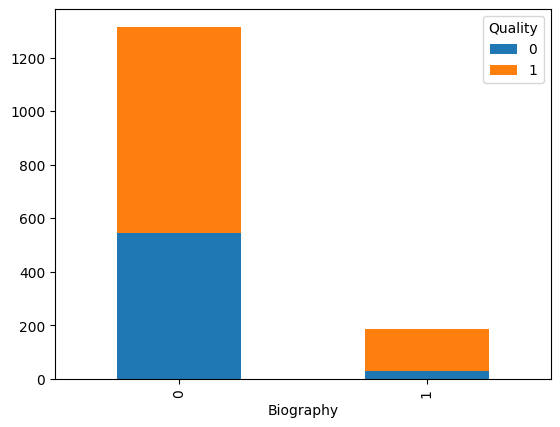

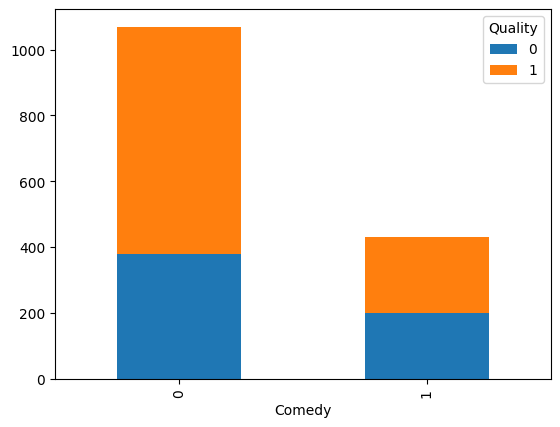

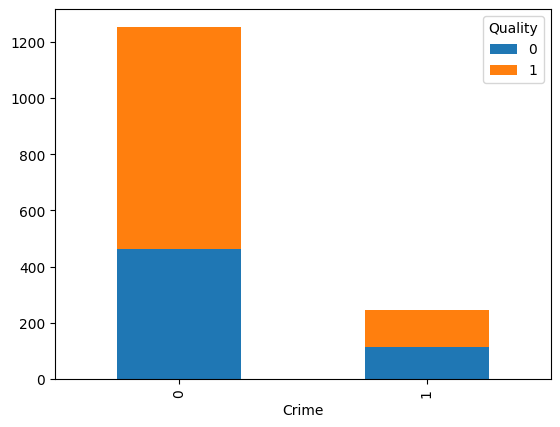

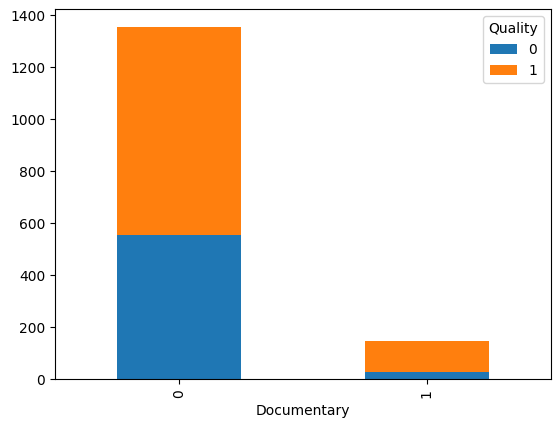

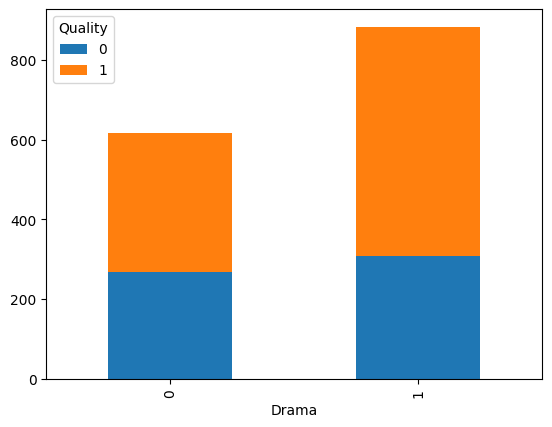

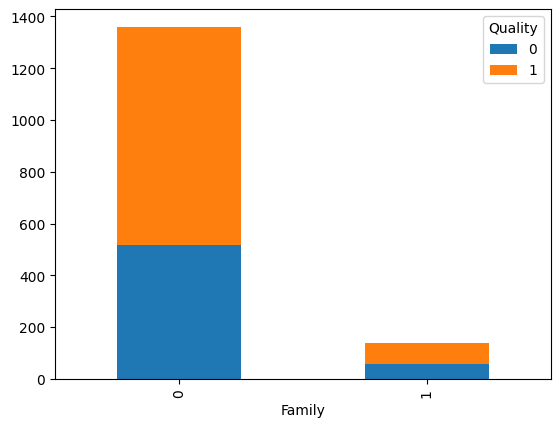

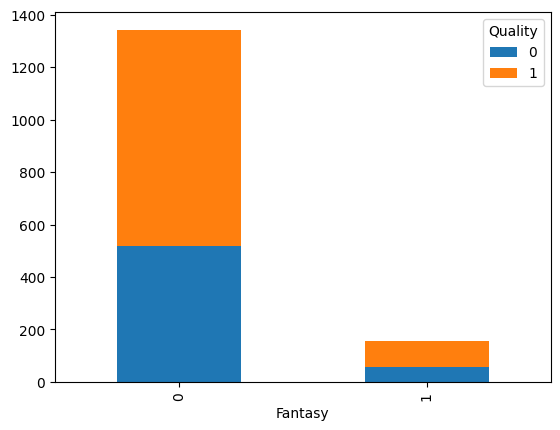

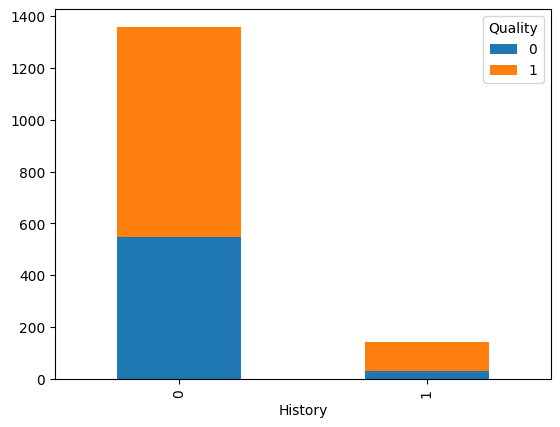

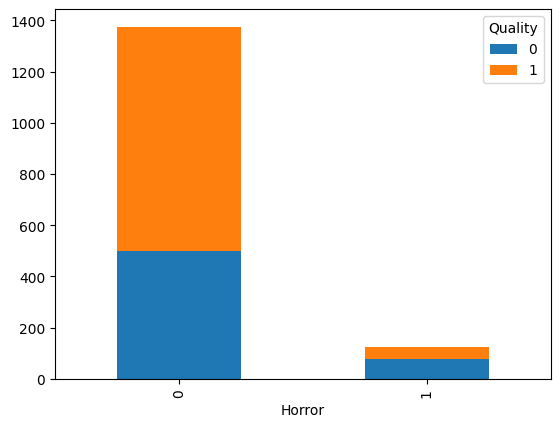

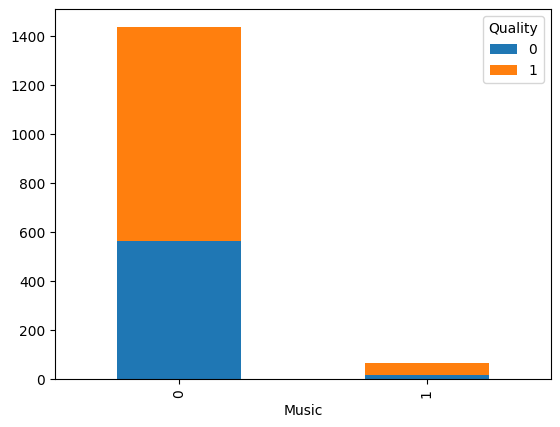

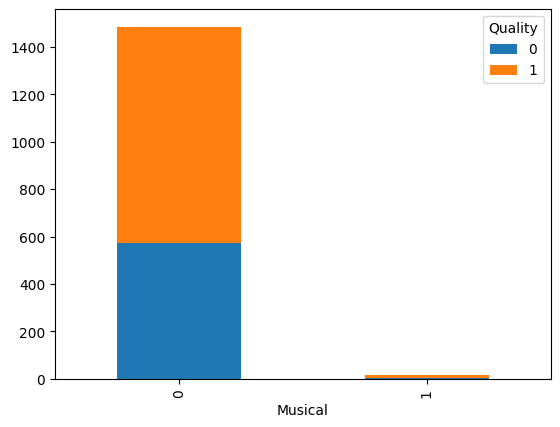

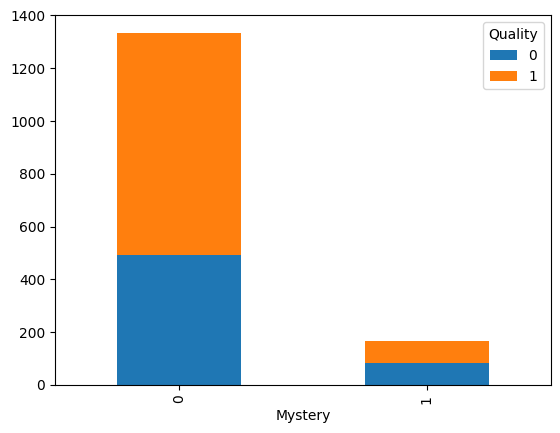

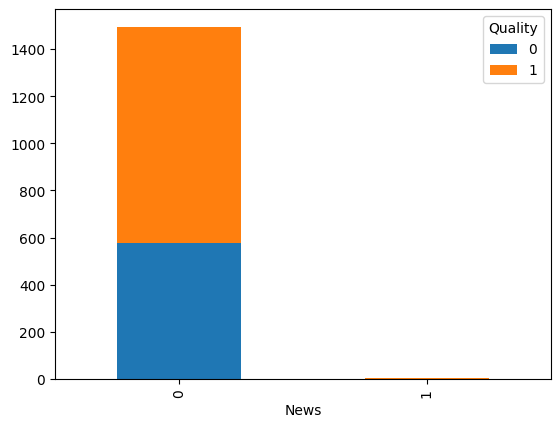

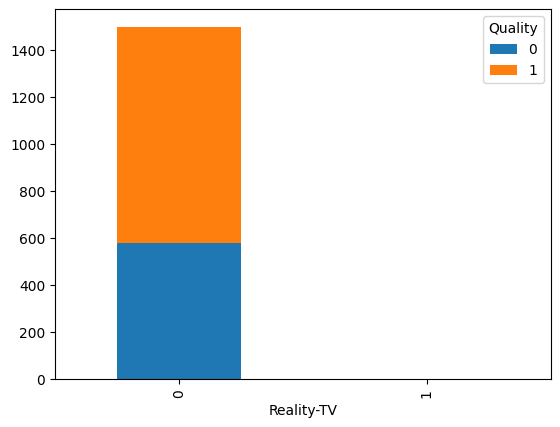

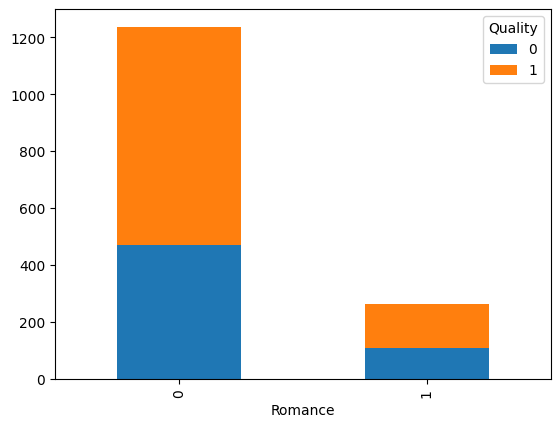

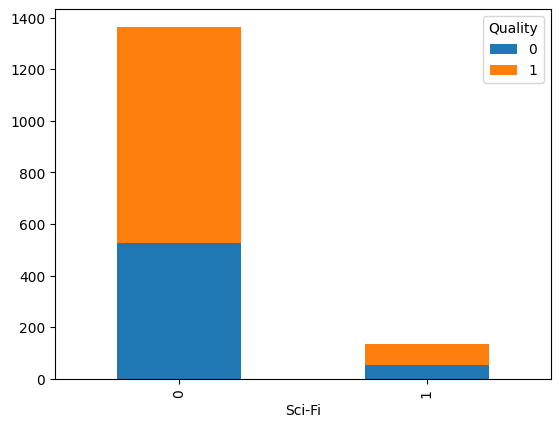

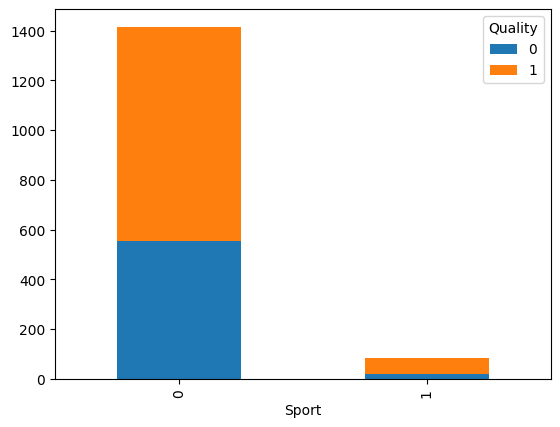

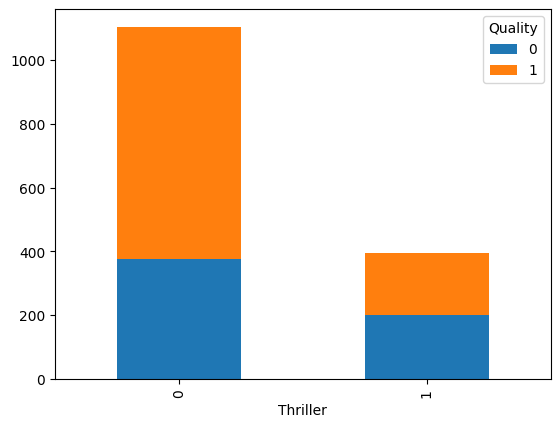

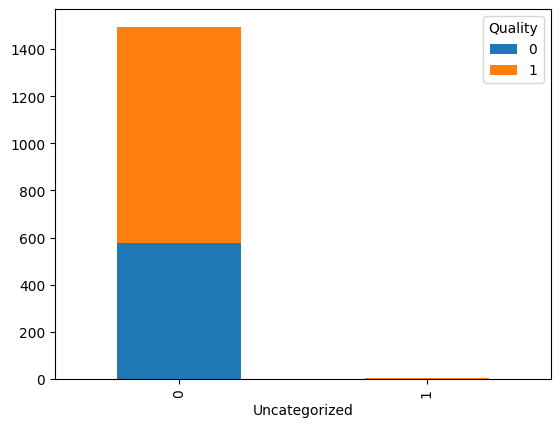

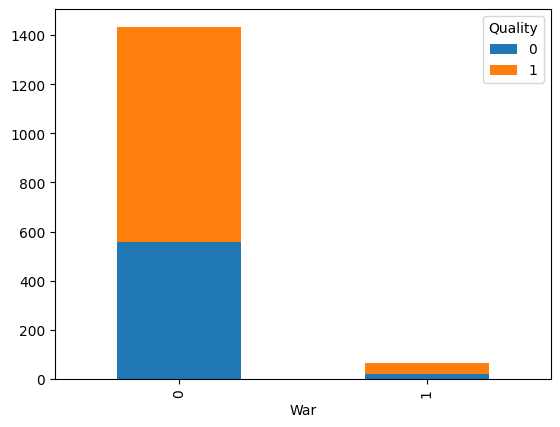

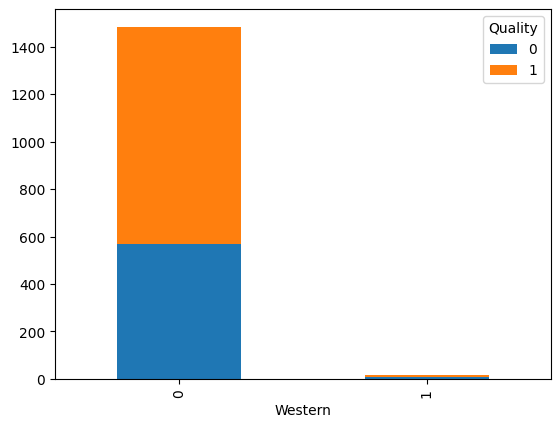

In [ ]:
for i in df_train.columns[12:]:
  df2 = df_train.groupby([i, 'Quality'])[i].count().unstack('Quality').fillna(0)
  df2.plot(kind='bar', stacked=True)

/tmp/ipython-input-4171883020.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train.Quality == 1 ].Runtime,label = 'Good')
/tmp/ipython-input-4171883020.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train.Quality == 0 ].Runtime, label = 'Bad')


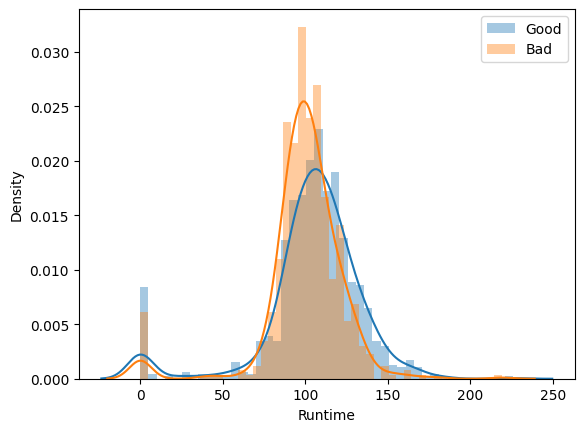

In [ ]:
sns.distplot(df_train.loc[df_train.Quality == 1 ].Runtime,label = 'Good')
sns.distplot(df_train.loc[df_train.Quality == 0 ].Runtime, label = 'Bad')
plt.legend()

<Axes: xlabel='Year'>

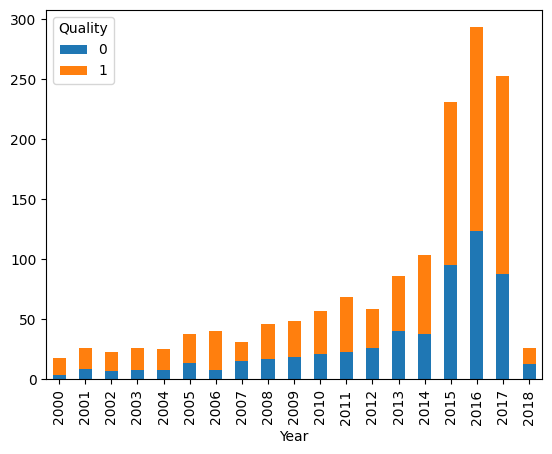

In [ ]:
time_quality = df_train.groupby(['Year', 'Quality'])['Year'].count().unstack('Quality').fillna(0)
time_quality.plot(kind='bar', stacked=True)

<Axes: xlabel='Year'>

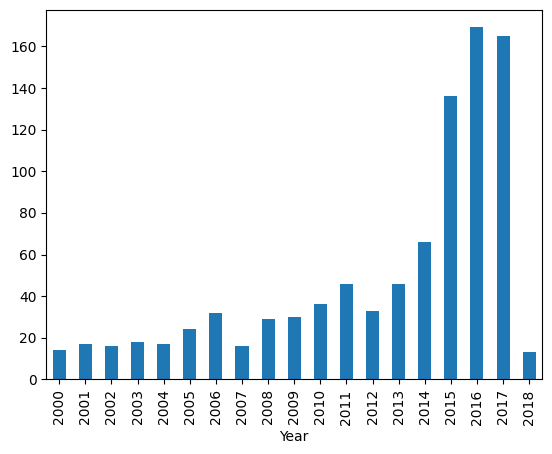

In [ ]:

df_train.loc[df_train.Quality ==1].Year.value_counts().sort_index().plot.bar()
df_train.loc[df_train.Quality ==0].Year.value_counts().sort_index().plot.bar()

In [ ]:
df_train.Director = df_train.Director.astype('category')
df_train.Writers = df_train.Director.astype('category')

cat_columns = df_train.select_dtypes(['category']).columns
df_train[cat_columns] = df_train[cat_columns].apply(lambda x: x.cat.codes)

df_test.Director = df_test.Director.astype('category')
df_test.Writers = df_test.Director.astype('category')

cat_columns = df_test.select_dtypes(['category']).columns
df_test[cat_columns] = df_test[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
import numpy as np


add_col = ['Runtime','Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Uncategorized',
       'War', 'Western']

X_add= np.array(df_train[add_col])
X_add_test = np.array(df_test[add_col])

tfidf = np.column_stack((tfidf, X_add)) # combine as array
tfidf_test = np.column_stack((tfidf_test, X_add_test))

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(random_state=0)
Lr.fit(tfidf, y)
y_pred = Lr.predict(tfidf_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.6633333333333333
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       101
           1       0.75      0.74      0.75       199

    accuracy                           0.66       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.66      0.66      0.66       300



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
